<a href="https://colab.research.google.com/github/mrapen/Summary-document/blob/main/%D0%86%D0%A2%D0%A5%D0%9E_%D0%9B%D0%A05_%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B4%D0%B0%D1%85_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/coffee-bean-dataset-resized-224-x-224")
train_path = path + "/train"
test_path = path + "/test"
print("Path to dataset files:", path)

100%|██████████| 144M/144M [00:01<00:00, 79.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224/versions/1


In [5]:
tr_df = train_df(train_path)
tr_df

,Class Path,Class
0,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
1,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
2,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
3,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
4,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
...,...,...
1195,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
1196,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
1197,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
1198,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark


In [6]:
ts_df = test_df(test_path)
ts_df

,Class Path,Class
0,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
1,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
2,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
3,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
4,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
...,...,...
395,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
396,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
397,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
398,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark


In [7]:
valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)
valid_df

,Class Path,Class
345,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
399,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
330,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
238,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Light
293,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Light
...,...,...
393,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
218,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Light
223,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Light
271,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Light


In [8]:
ts_df

,Class Path,Class
10,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
382,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
374,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Dark
196,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Green
47,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
...,...,...
66,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
281,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Light
44,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium
80,/root/.cache/kagglehub/datasets/gpiosenka/coff...,Medium


In [9]:
batch_size = 16
img_size = (224,224)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 1200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


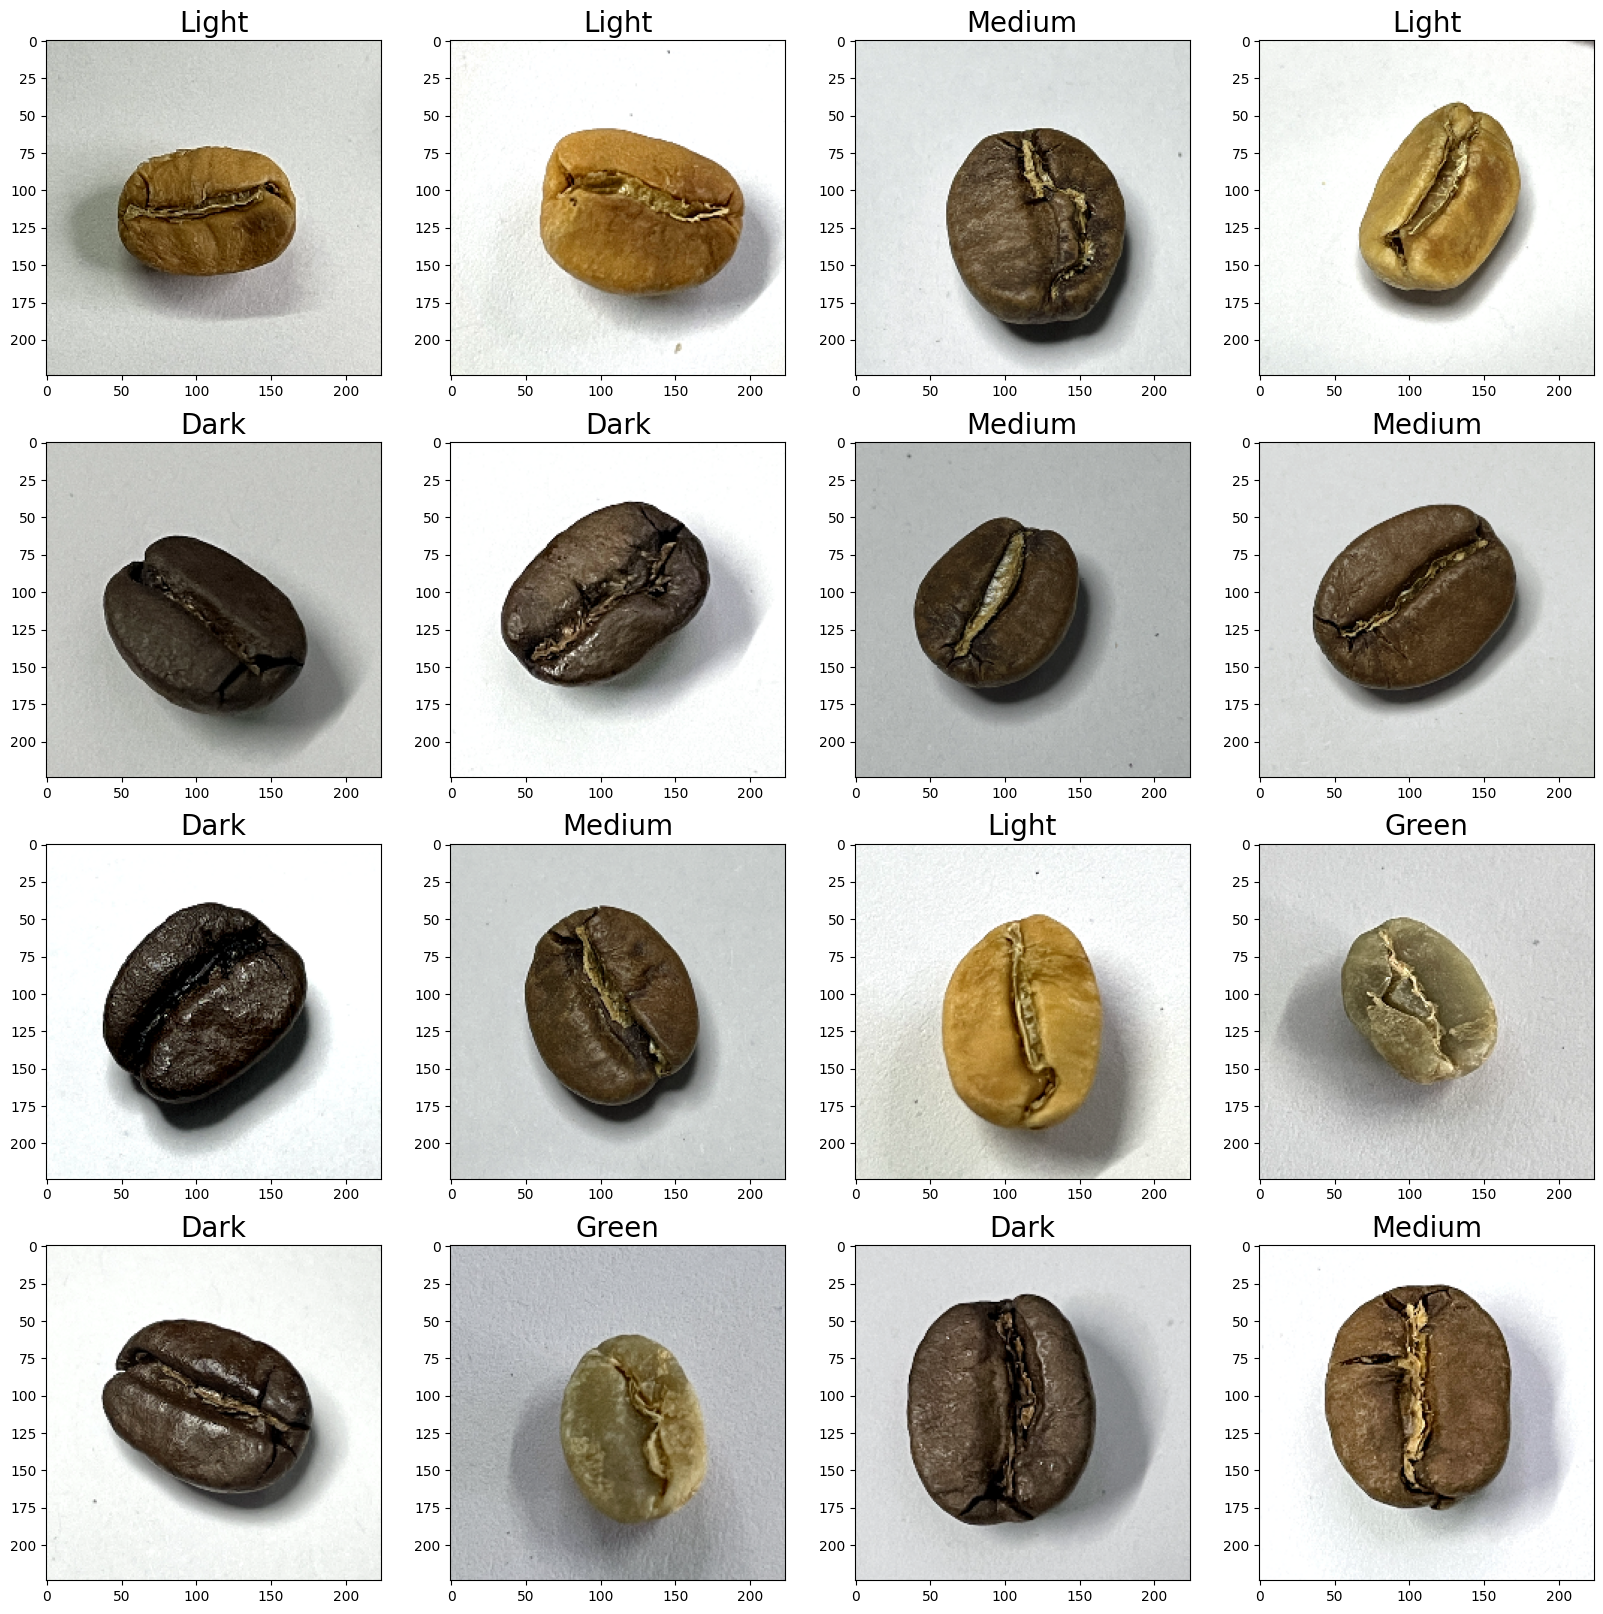

In [10]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [11]:
num_classes = len(classes)
num_classes

4

In [12]:
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    classes=num_classes,
    input_shape=(224, 224, 3),
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(num_classes, activation= 'softmax')
])

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
                 callbacks=es)

Epoch 1/5
74/75 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9902 - loss: 0.0312

In [16]:
model.evaluate(ts_gen, verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 895ms/step - accuracy: 1.0000 - loss: 0.0056


[0.00789271853864193, 1.0]

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

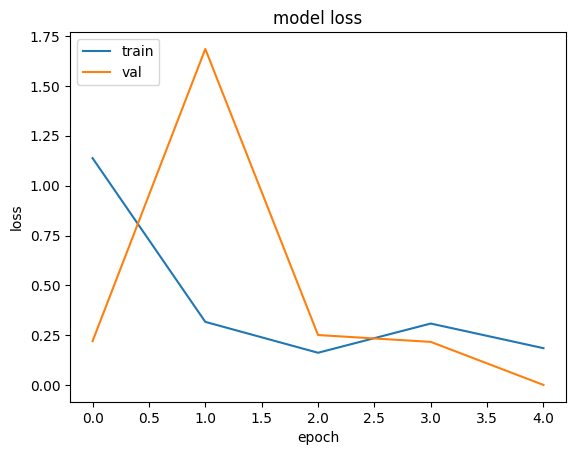

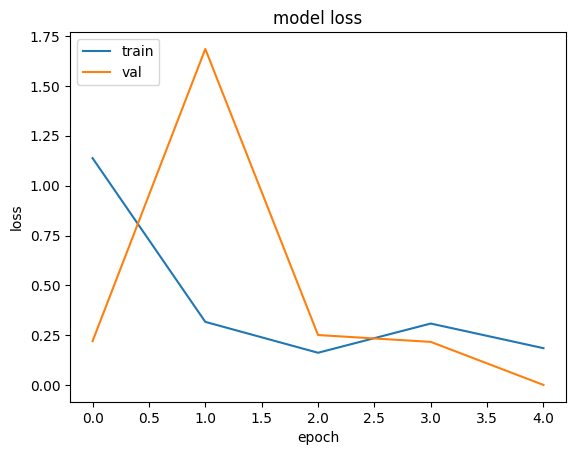

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()